### Load dataset and packages 

In [714]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [715]:
data = pd.read_csv('Dataset/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [716]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
22,23,4.6,3.6,1.0,0.2,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
11,12,4.8,3.4,1.6,0.2,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
...,...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor


In [717]:
train_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
22,23,4.6,3.6,1.0,0.2,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
11,12,4.8,3.4,1.6,0.2,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
...,...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor


In [718]:
train_data['Species'] = train_data['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [719]:
train_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
22,23,4.6,3.6,1.0,0.2,0
15,16,5.7,4.4,1.5,0.4,0
65,66,6.7,3.1,4.4,1.4,1
11,12,4.8,3.4,1.6,0.2,0
42,43,4.4,3.2,1.3,0.2,0
...,...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3,1
106,107,4.9,2.5,4.5,1.7,2
14,15,5.8,4.0,1.2,0.2,0
92,93,5.8,2.6,4.0,1.2,1


In [720]:
inputs , real_output = np.array(train_data.drop([ 'Id','Species'] , axis=1)) ,np.array(train_data['Species']).reshape((120,1))

weight_layer_1 =np.random.rand(inputs.shape[1] , 4)
weight_layer_2 =np.random.rand(4 , 1)


In [721]:
inputs.shape ,real_output.shape , weight_layer_1.shape , weight_layer_2

((120, 4),
 (120, 1),
 (4, 4),
 array([[0.38440116],
        [0.88261226],
        [0.85193335],
        [0.48616205]]))

## Implementing 

In [722]:
def model(inputs , weights):
    return inputs.dot(weights)

In [723]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [724]:
def sigmoid_derivative (x):
    return (np.exp(x))/(np.exp(x)+1)**2

In [725]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x, axis=1, keepdims=True)
    return exp_x / sum_exp_x

In [726]:
def softmax_derivative(x):
    """
    Compute the derivative of softmax function.
    
    Arguments:
    x -- A numpy array of shape (n, m).
    
    Returns:
    The derivative of the softmax function for the input x.
    """
    s = np.exp(x) / np.sum(np.exp(x), axis=0)
    ds = np.diagflat(s) - np.dot(s, s.T)
    return ds

In [727]:
def error(otput , real_output):
    return np.sqrt(np.square(np.subtract(otput, real_output)).mean())

def rmse(y_pred , y_true):

    n = y_true.shape[0]  # number of samples
    diff = y_pred - y_true  # difference between predicted and true values
    mse = (1/n) * np.sum(diff ** 2)  # mean squared error
    rmsee = np.sqrt(mse)  # root mean squared error
    return rmsee

def rmse_derivative(y_pred , y_true):
    N = y_true.shape[0]
    diff = y_pred - y_true
    mse = np.mean(diff ** 2)
    rmse = np.sqrt(mse)
    return diff / (rmse * N)

def d_rmse(y_pred , y_true):
    """
    Calculates the derivative of RMSE (Root Mean Squared Error) loss function with respect to y_pred
    
    Arguments:
    y_true -- true values of the output (ground truth)
    y_pred -- predicted values of the output
    
    Returns:
    derivative of RMSE loss function with respect to y_pred
    """
    n = y_true.shape[0]  # number of samples
    diff = y_pred - y_true  # difference between predicted and true values
    d_rmse = (2/n) * np.dot(diff.T, diff)  # derivative of RMSE w.r.t y_pred
    return d_rmse


In [728]:
hidden = sigmoid(model(inputs , weight_layer_1))
predicted_output = sigmoid(model(hidden , weight_layer_2))
predicted_output.shape , hidden.shape

((120, 1), (120, 4))

In [729]:
rmse(predicted_output , real_output )

0.8111171738817324

In [730]:
def gradient (inputs , weight_layer_1 , weight_layer_2 , real_output ):
    
    hidden = sigmoid(model(inputs , weight_layer_1)) # OS1 shape ()
    
    predicted_output = sigmoid(model(hidden , weight_layer_2)) # OS2

    dE = predicted_output - real_output

    dYp = sigmoid_derivative(model(hidden , weight_layer_2))
    dS2 = sigmoid_derivative(hidden)
    dOS = sigmoid_derivative(model(inputs , weight_layer_1))

    # d_output_1 = sigmoid_derivative(model(inputs , weight_layer_1))

    # print(f'dE : {dE.shape} dYp: {dYp.shape} d_output1: {d_output_1.shape} weight_layer_2 : {weight_layer_2.shape} weight_layer_1 {weight_layer_1.shape} hidden{hidden.shape} predicted_output{predicted_output.shape}')
    dw2 = np.dot(dE.T ,dYp.dot(weight_layer_2.T)).T.astype(float)
    dw1 = dE.dot(dYp.T).T.dot(dS2).T.dot(dOS).dot(weight_layer_1).astype(float)
    
    return  dw1 , dw2

In [731]:
# test1 ,test2 = gradient(inputs , weight_layer_1 , weight_layer_2 , real_output)

In [732]:
def update (dw1 ,dw2 ,weight_layer_1 , weight_layer_2 ,learning_rate ):
    weight_layer_2  = weight_layer_2 - (learning_rate * dw2)
    weight_layer_1  = weight_layer_1 - (learning_rate * dw1)
    return weight_layer_1 ,weight_layer_2

In [733]:
# update(test1 ,test2  ,weight_layer_1 ,weight_layer_2 ,0.01)

In [734]:
def artificial_nueral(inputs , weight_layer_1 ,weight_layer_2 , real_output , epoch_number =60 , learning_rate = 0.01):
    cost = []
    import matplotlib.pylab as plt 
    for i in range(epoch_number):
        hidden = sigmoid(model(inputs ,weight_layer_1))
        predicted_output = sigmoid(model(hidden , weight_layer_2 ))
        cost.append(error(predicted_output , real_output ))
        dw1 , dw2 = gradient(inputs , weight_layer_1 , weight_layer_2 , real_output)
        weight_layer_1 , weight_layer_2 = update(dw1 ,dw2  ,weight_layer_1 ,weight_layer_2 ,learning_rate)
    plt.plot(cost)
    plt.show()
    return weight_layer_1 ,weight_layer_2

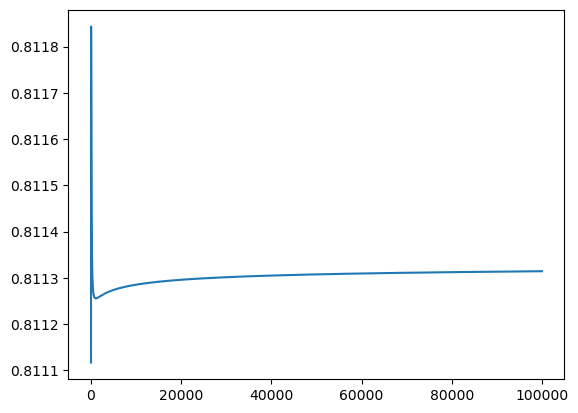

(array([[0.27255244, 1.84368488, 1.29733718, 0.57573704],
        [0.85038141, 1.98580357, 1.85924457, 0.88533398],
        [0.34137569, 2.18132288, 1.66131538, 0.89102803],
        [0.5455629 , 2.64486822, 1.35252898, 1.24468948]]),
 array([[0.67683551],
        [1.55406219],
        [1.50004421],
        [0.85601128]]))

In [739]:
artificial_nueral(inputs ,weight_layer_1 ,weight_layer_2 ,real_output  ,100000)

In [ ]:
def predict(X, parametres):
  activations = sigmoid(model(X, parametres))
  A2 = activations['A2']
  return A2 >= 0.5

In [736]:
import numpy as np

# Define two matrices
A = np.array([[2, 2, 2], [5, 5, 5], [8, 8, 7]])
B = np.array([[2, 2, 2], [5, 5, 5], [8, 8, 8]])

# Calculate the RMSE
rmse = np.sqrt(np.square(np.subtract(A, B)).mean())
print("RMSE:", rmse)


RMSE: 0.3333333333333333
